# **Preparing The Datasets**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import gc

The datasets we are going to use in this project are called "dft-road-casualty-statistics-casualty-last-5-years", "dft-road-casualty-statistics-vehicle-last-5-years" and "dft-road-casualty-statistics-collision-last-5-years". They can be downloaded for free from the [Website of the UK government](https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data). When combined, the datasets consist of a total of 665408 observations and 85 features. All of the features are encoded with integer numbers, [Here is the guide on their meaning](https://doc.ukdataservice.ac.uk/doc/7752/mrdoc/pdf/7752_ukds_user_guide_2014.pdf).

Now let's load the datasets and combine them:

In [2]:
uk_accidents_casualties = pd.read_csv("../data/dft-road-casualty-statistics-casualty-last-5-years.csv", na_values = [-1, "NULL"], low_memory = False)

In [3]:
uk_accidents_vehicles = pd.read_csv("../data/dft-road-casualty-statistics-vehicle-last-5-years.csv", na_values = [-1, "NULL"], low_memory = False)

In [4]:
uk_accidents_collisions = pd.read_csv("../data/dft-road-casualty-statistics-collision-last-5-years.csv", na_values = [-1, "NULL"], low_memory = False)

In [5]:
temp_merge = pd.merge(uk_accidents_collisions, uk_accidents_vehicles, how = "inner")

In [6]:
uk_accidents_all_cols = pd.merge(temp_merge, uk_accidents_casualties, on = uk_accidents_collisions.index.name, how = "inner")

In [7]:
uk_accidents_all_cols

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty,enhanced_casualty_severity,casualty_distance_banding
0,2019010128300,2019,010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,...,0.0,0.0,0.0,0.0,9.0,1.0,2.0,E01003175,NaN,2.0
1,2019010128300,2019,010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,...,0.0,1.0,0.0,0.0,9.0,1.0,5.0,E01003411,NaN,3.0
2,2019010128300,2019,010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,...,0.0,2.0,0.0,0.0,9.0,1.0,5.0,E01003413,NaN,3.0
3,2019010152270,2019,010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,...,0.0,0.0,0.0,0.0,9.0,1.0,3.0,E01003180,NaN,1.0
4,2019010155191,2019,010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,E01016964,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665403,2023991452286,2023,991452286,246754.0,661133.0,-4.447490,55.819059,99,2,1,...,8.0,0.0,0.0,0.0,0.0,1.0,2.0,NaN,7.0,1.0
665404,2023991452640,2023,991452640,224491.0,581627.0,-4.752200,55.097920,99,3,2,...,9.0,0.0,0.0,2.0,0.0,3.0,4.0,NaN,3.0,1.0
665405,2023991453360,2023,991453360,383341.0,806427.0,-2.276957,57.148422,99,3,2,...,0.0,0.0,0.0,0.0,3.0,1.0,7.0,NaN,3.0,2.0
665406,2023991461915,2023,991461915,271662.0,655488.0,-4.047591,55.775637,99,3,1,...,3.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3.0,1.0


Now freeing the memory from datasets we are not going to use anymore:

In [8]:
del uk_accidents_casualties
del uk_accidents_vehicles
del uk_accidents_collisions

gc.collect()

0

There are some features, that don't make sense to be modeled. There are also columns, where I couldn't find information about their encoding. Lets get rid of them:

In [9]:
columns_to_get_rid_of = ["accident_index", "accident_reference", "location_easting_osgr", "location_northing_osgr", "longitude",
                         "latitude", "police_force", "local_authority_ons_district", "local_authority_highway",
                         "first_road_number", "second_road_number", "urban_or_rural_area", "trunk_road_flag",
                         "lsoa_of_accident_location", "enhanced_severity_collision", "vehicle_reference",
                         "casualty_reference", "casualty_type", "casualty_home_area_type", "casualty_imd_decile",
                         "lsoa_of_casualty", "enhanced_casualty_severity", "casualty_distance_banding",
                         "driver_imd_decile", "driver_home_area_type", "lsoa_of_driver", "driver_distance_banding",
                         "propulsion_code", "generic_make_model", "age_band_of_driver"]

In [10]:
uk_accidents_df = uk_accidents_all_cols.drop(columns = columns_to_get_rid_of)

In [11]:
del uk_accidents_all_cols

gc.collect()

0

Let's look at the dtypes of the features:

In [12]:
uk_accidents_df.dtypes

accident_year                                    int64
accident_severity                                int64
number_of_vehicles                               int64
number_of_casualties                             int64
date                                            object
day_of_week                                      int64
time                                            object
local_authority_district                       float64
first_road_class                                 int64
road_type                                        int64
speed_limit                                    float64
junction_detail                                float64
junction_control                               float64
second_road_class                              float64
pedestrian_crossing_human_control              float64
pedestrian_crossing_physical_facilities        float64
light_conditions                               float64
weather_conditions                             float64
road_surfa

Now the only "object" features are the date and time features. Let's take a deeper look into "date" first:

In [13]:
uk_accidents_df["date"]

0         18/02/2019
1         18/02/2019
2         18/02/2019
3         15/01/2019
4         01/01/2019
             ...    
665403    07/12/2023
665404    06/10/2023
665405    15/11/2023
665406    07/02/2023
665407    07/07/2023
Name: date, Length: 665408, dtype: object

As we can see, it's not very well formatted and also we already have the years as a separate feature. It makes the most sense to just separate the month and the day.

In [14]:
def adjust_date(df):
    df["day_of_month"] = df["date"].str.slice(stop = 2)
    df["day_of_month"] = df["day_of_month"].astype(int)

    df["month"] = df["date"].str.slice(start = 3, stop = -5)
    df["month"] = df["month"].astype(int)

    return df.drop(columns = ["date"])

In [15]:
uk_accidents_df = adjust_date(uk_accidents_df)

Now we are going to take a look at the "time" column:

In [16]:
uk_accidents_df["time"]

0         17:50
1         17:50
2         17:50
3         21:45
4         01:50
          ...  
665403    08:43
665404    10:10
665405    17:00
665406    21:40
665407    16:17
Name: time, Length: 665408, dtype: object

In [17]:
def convert_to_approx_hours(str):
            hour = int(str[:2])
            minute = int(str[-2:])
            if minute > 30:
                hour += 1
            if hour == 24:
                hour = 0
            return hour

def adjust_time(df):
    df["time_rounded"] = df["time"].apply(convert_to_approx_hours)
    return df.drop(columns = ["time"])

In [18]:
uk_accidents_df = adjust_time(uk_accidents_df)

In [19]:
uk_accidents_df["time_rounded"]

0         18
1         18
2         18
3         22
4          2
          ..
665403     9
665404    10
665405    17
665406    22
665407    16
Name: time_rounded, Length: 665408, dtype: int64

Now let's take a look at the missing values:

In [20]:
missing_values_counts = {c : val for c, val in sorted({col : uk_accidents_df[col].isna().value_counts().get(True, 0) for col in uk_accidents_df.columns}.items(), key = lambda items: items[1], reverse = True)}

In [21]:
missing_values_counts

{'dir_to_e': 609185,
 'dir_to_n': 609185,
 'dir_from_e': 608731,
 'dir_from_n': 608731,
 'local_authority_district': 397644,
 'junction_control': 287576,
 'engine_capacity_cc': 161113,
 'age_of_vehicle': 156696,
 'age_of_driver': 33417,
 'age_of_casualty': 14549,
 'age_band_of_casualty': 14549,
 'vehicle_direction_to': 9231,
 'vehicle_direction_from': 9114,
 'special_conditions_at_site': 5842,
 'carriageway_hazards': 5817,
 'pedestrian_crossing_human_control': 5083,
 'sex_of_casualty': 5052,
 'pedestrian_crossing_physical_facilities': 5021,
 'first_point_of_impact': 4880,
 'skidding_and_overturning': 4251,
 'vehicle_leaving_carriageway': 4243,
 'hit_object_in_carriageway': 4171,
 'vehicle_location_restricted_lane': 4157,
 'vehicle_manoeuvre': 4115,
 'towing_and_articulation': 3539,
 'road_surface_conditions': 3245,
 'car_passenger': 2929,
 'junction_location': 1845,
 'vehicle_left_hand_drive': 971,
 'pedestrian_road_maintenance_worker': 918,
 'hit_object_off_carriageway': 679,
 'second

Let's create a bar plot to better see the results we get:

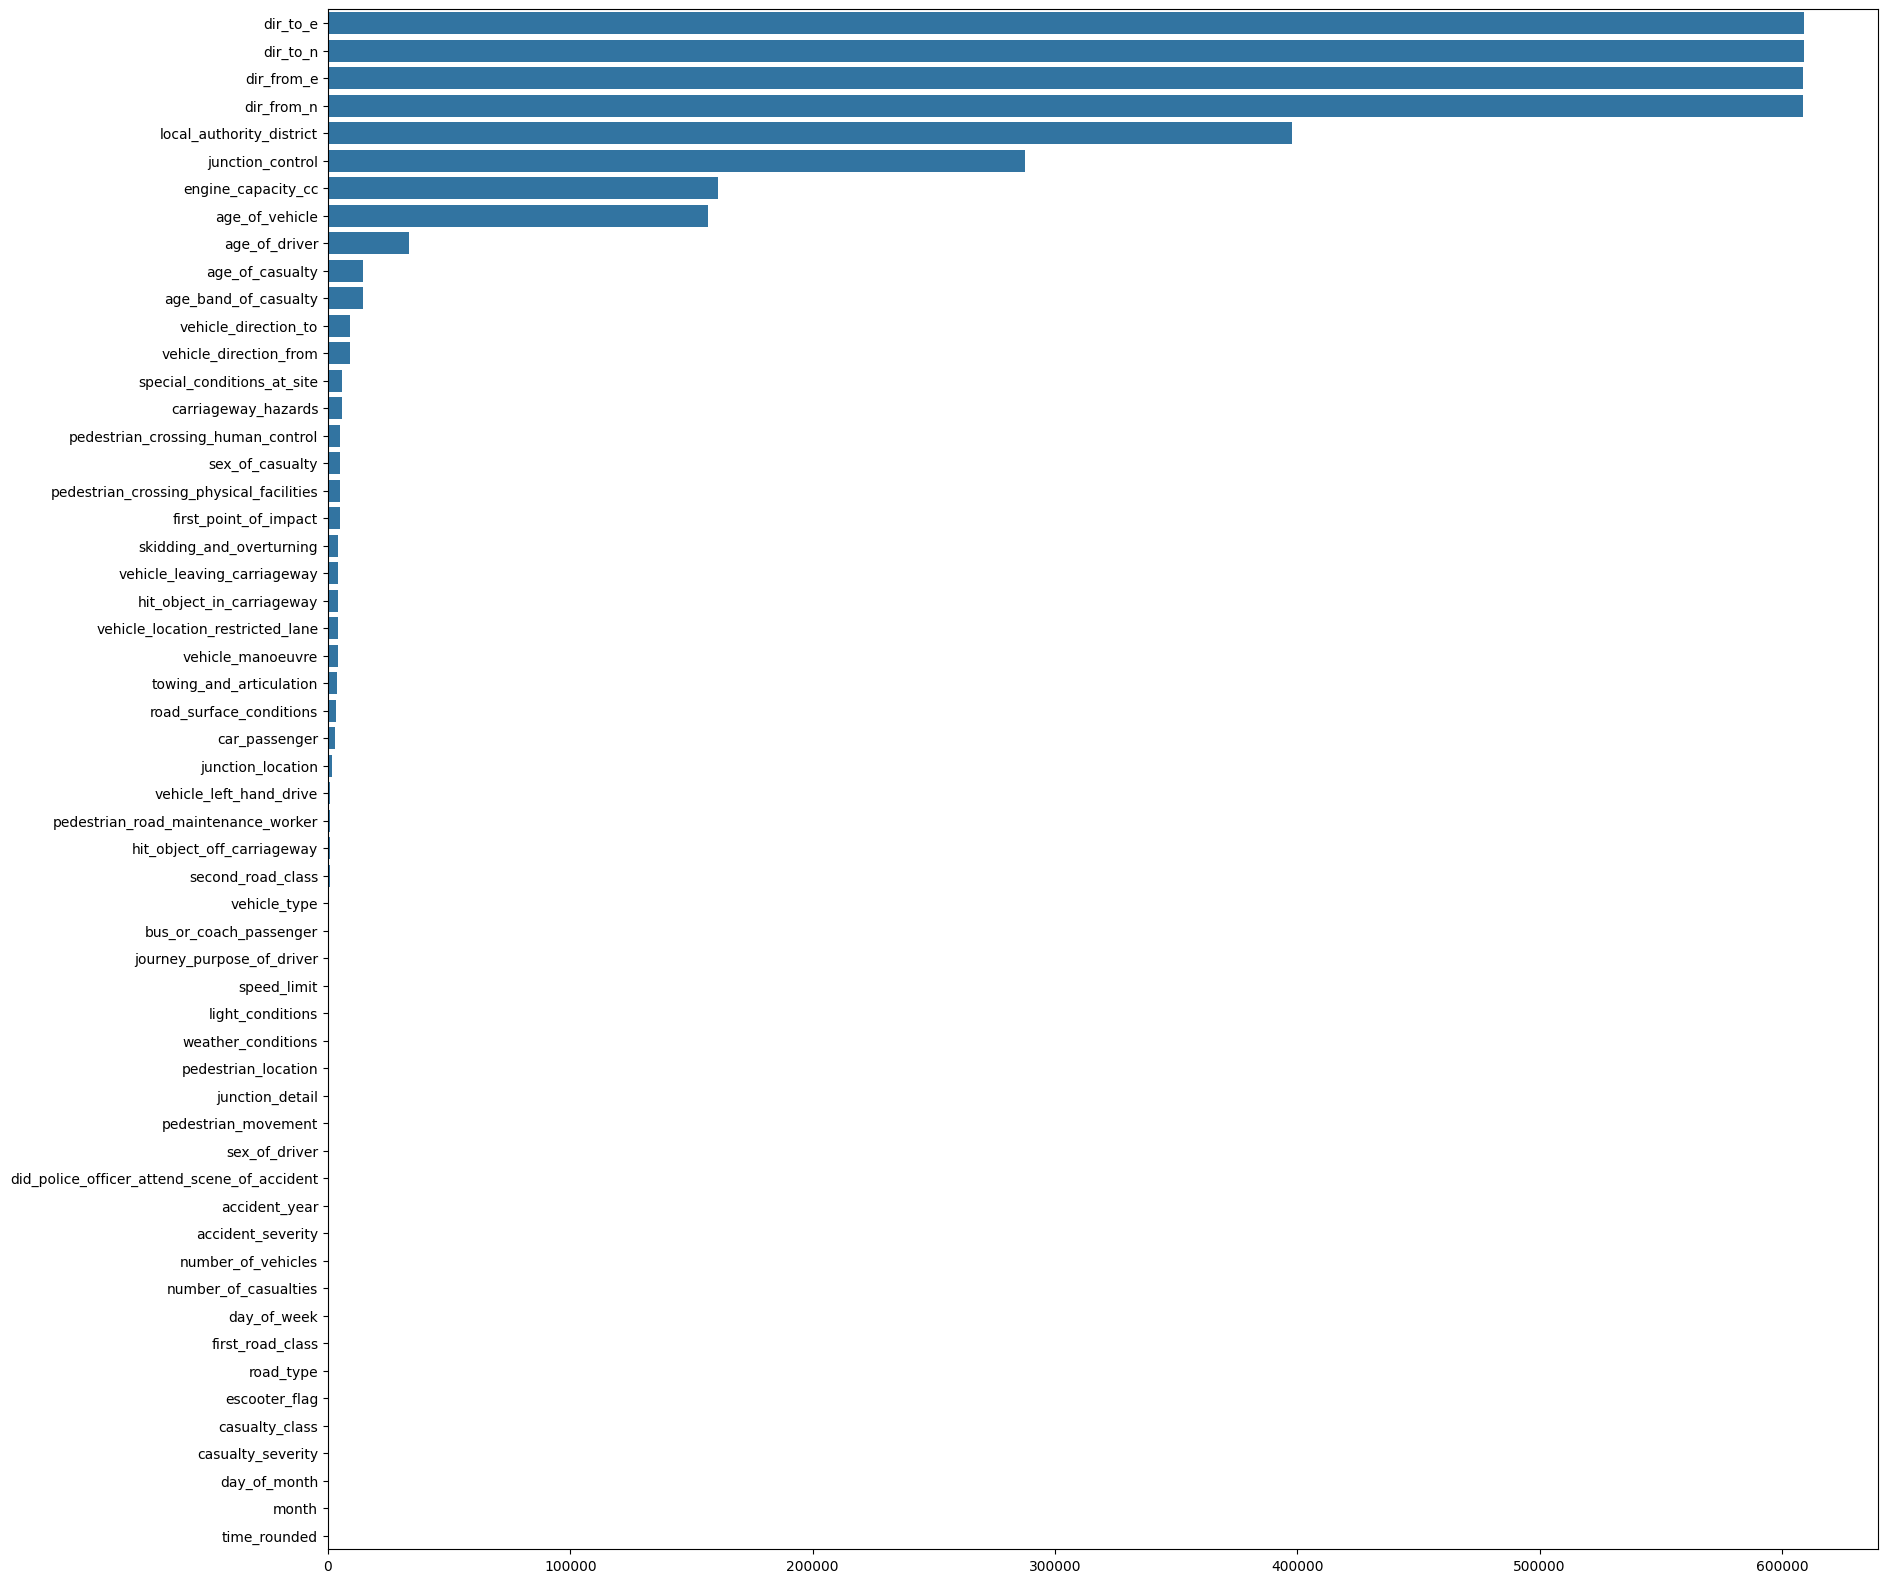

In [22]:
plt.figure(figsize = (20, 20))
sns.barplot(missing_values_counts, orient = "h")
plt.show()

It looks like there are columns where more than half of the values are missing. Let's create a list with the names of the columns we have to remove:

In [23]:
cols_to_drop = [key for key, val in missing_values_counts.items() if val > 300000]

Now let's explore every other feature individually and see what we can do with it:

In [24]:
uk_accidents_df["junction_control"].value_counts(dropna = False)

junction_control
NaN    287576
4.0    285452
2.0     74147
9.0     11049
3.0      4518
1.0      2661
0.0         5
Name: count, dtype: int64

It also has many missing values so it's better to just remove it:

In [25]:
cols_to_drop.append("junction_control")

Now let's take a look at the engine capacity of each vehicle:

In [26]:
uk_accidents_df["engine_capacity_cc"].describe()

count    504295.000000
mean       1631.158153
std        1259.034922
min           2.000000
25%        1198.000000
50%        1499.000000
75%        1968.000000
max       29980.000000
Name: engine_capacity_cc, dtype: float64

In [27]:
uk_accidents_df["engine_capacity_cc"].median()

1499.0

It makes the most sense to make imputations, based on vehicle type, because their engines differ vastly and also there are some vehicles, that just don't have engines. So let's take a look at the vehicle types as well:

In [28]:
uk_accidents_df["vehicle_type"].value_counts(dropna = False)

vehicle_type
9.0     431020
1.0      82449
3.0      42632
19.0     25843
5.0      22671
11.0     13927
8.0      11348
4.0       9604
90.0      7395
2.0       5654
21.0      3273
97.0      2101
20.0      1549
22.0      1374
10.0      1157
98.0      1155
23.0      1010
17.0       482
16.0       360
NaN        301
18.0        68
99.0        35
Name: count, dtype: int64

In [29]:
uk_accidents_df['engine_capacity_cc'] = uk_accidents_df.groupby('vehicle_type')['engine_capacity_cc'].transform(
    lambda x: x.fillna(x.median())
)

/home/gecata/.local/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/gecata/.local/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/gecata/.local/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/gecata/.local/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/gecata/.local/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [30]:
uk_accidents_df["engine_capacity_cc"].describe()

count    580821.000000
mean       1643.555770
std        1267.844637
min           2.000000
25%        1200.000000
50%        1560.000000
75%        1968.000000
max       29980.000000
Name: engine_capacity_cc, dtype: float64

In [31]:
uk_accidents_df[uk_accidents_df["engine_capacity_cc"].isna()]["vehicle_type"].value_counts()

vehicle_type
1.0     82449
22.0     1374
16.0      360
18.0       68
99.0       35
Name: count, dtype: int64

Here, we can see, that now only the vehicles with no engine have missing values for the capacity.

Now let's take a look at the vehicle and driver age:

In [32]:
uk_accidents_df["age_of_vehicle"].describe()

count    508712.000000
mean          8.391538
std           5.882810
min           0.000000
25%           4.000000
50%           8.000000
75%          12.000000
max         122.000000
Name: age_of_vehicle, dtype: float64

In [33]:
uk_accidents_df["age_of_vehicle"].median()

8.0

Let's set the age of every missing vehicle to 8:

In [34]:
uk_accidents_df.loc[uk_accidents_df["age_of_vehicle"].isna(), "age_of_vehicle"] = 8

In [35]:
uk_accidents_df["age_of_driver"].describe()

count    631991.000000
mean         40.005633
std          16.803612
min           1.000000
25%          27.000000
50%          37.000000
75%          51.000000
max         101.000000
Name: age_of_driver, dtype: float64

In [36]:
uk_accidents_df["age_of_driver"].median()

37.0

In [37]:
uk_accidents_df.loc[uk_accidents_df["age_of_driver"].isna(), "age_of_driver"] = 37

In [38]:
uk_accidents_df["age_of_casualty"].describe()

count    650859.000000
mean         37.653261
std          18.896579
min           0.000000
25%          23.000000
50%          34.000000
75%          51.000000
max         102.000000
Name: age_of_casualty, dtype: float64

In [39]:
uk_accidents_df["age_of_casualty"].median()

34.0

In [40]:
uk_accidents_df.loc[uk_accidents_df["age_of_driver"].isna(), "age_of_driver"] = 34

Now for the other columns, most often a missing value is encoded with either "9" or "99". Let's create two lists for the columns where these values should be remapped to -1.

In [41]:
to_remap_9_and_nan_to_minus_1 = []
to_remap_99_and_nan_to_minus_1 = []

In [42]:
uk_accidents_df["carriageway_hazards"].value_counts(dropna = False)

carriageway_hazards
0.0    635883
9.0     10021
2.0      7066
NaN      5817
7.0      2096
1.0      1646
3.0      1613
6.0      1266
Name: count, dtype: int64

In [43]:
to_remap_9_and_nan_to_minus_1.append("carriageway_hazards")

In [44]:
uk_accidents_df["special_conditions_at_site"].value_counts(dropna = False)

special_conditions_at_site
0.0    632205
9.0     11580
4.0      8415
NaN      5842
1.0      1840
7.0      1693
5.0      1421
3.0      1158
6.0       944
2.0       310
Name: count, dtype: int64

In [45]:
to_remap_9_and_nan_to_minus_1.append("special_conditions_at_site")

In [46]:
uk_accidents_df["pedestrian_crossing_human_control"].value_counts(dropna = False)

pedestrian_crossing_human_control
0.0    628024
9.0     22283
2.0      7373
NaN      5083
1.0      2645
Name: count, dtype: int64

In [47]:
to_remap_9_and_nan_to_minus_1.append("pedestrian_crossing_human_control")

In [48]:
uk_accidents_df["pedestrian_crossing_physical_facilities"].value_counts(dropna = False)

pedestrian_crossing_physical_facilities
0.0    510615
5.0     51429
4.0     35891
1.0     25642
9.0     19082
8.0     16140
NaN      5021
7.0      1588
Name: count, dtype: int64

In [49]:
to_remap_9_and_nan_to_minus_1.append("pedestrian_crossing_physical_facilities")

In [50]:
uk_accidents_df["vehicle_direction_from"].value_counts(dropna = False)

vehicle_direction_from
1.0    105245
5.0     99527
3.0     91269
7.0     87586
6.0     56480
2.0     56231
4.0     53681
8.0     53085
9.0     44645
NaN      9114
0.0      8545
Name: count, dtype: int64

In [51]:
to_remap_9_and_nan_to_minus_1.append("vehicle_direction_from")

In [52]:
uk_accidents_df["vehicle_direction_to"].value_counts(dropna = False)

vehicle_direction_to
5.0    99891
1.0    99618
7.0    90508
3.0    90288
2.0    59172
6.0    56063
4.0    54288
8.0    54104
9.0    44644
NaN     9231
0.0     7601
Name: count, dtype: int64

In [53]:
to_remap_9_and_nan_to_minus_1.append("vehicle_direction_to")

In [54]:
uk_accidents_df["first_point_of_impact"].value_counts(dropna = False)

first_point_of_impact
1.0    333891
2.0    115073
3.0     84572
4.0     81788
0.0     25211
9.0     19993
NaN      4880
Name: count, dtype: int64

In [55]:
to_remap_9_and_nan_to_minus_1.append("first_point_of_impact")

In [56]:
uk_accidents_df["sex_of_casualty"].value_counts(dropna = False)

sex_of_casualty
1.0    406424
2.0    253889
NaN      5052
9.0        43
Name: count, dtype: int64

In [57]:
to_remap_9_and_nan_to_minus_1.append("sex_of_casualty")

In [58]:
uk_accidents_df["vehicle_leaving_carriageway"].value_counts(dropna = False)

vehicle_leaving_carriageway
0.0    513156
1.0     55226
9.0     42912
7.0     27632
2.0      7222
3.0      5107
NaN      4243
8.0      3801
4.0      3119
5.0      2053
6.0       937
Name: count, dtype: int64

In [59]:
to_remap_9_and_nan_to_minus_1.append("vehicle_leaving_carriageway")

In [60]:
uk_accidents_df["skidding_and_overturning"].value_counts(dropna = False)

skidding_and_overturning
0.0    517669
1.0     52966
9.0     43801
5.0     27365
2.0     19101
NaN      4251
3.0       147
4.0       108
Name: count, dtype: int64

In [61]:
to_remap_9_and_nan_to_minus_1.append("skidding_and_overturning")

In [62]:
uk_accidents_df["hit_object_in_carriageway"].value_counts(dropna = False)

hit_object_in_carriageway
0.0     573062
99.0     43258
10.0     15271
4.0      14310
7.0       5503
11.0      4479
NaN       4171
9.0       1287
12.0      1156
8.0        955
6.0        750
2.0        527
1.0        490
5.0        189
Name: count, dtype: int64

In [63]:
to_remap_99_and_nan_to_minus_1.append("hit_object_in_carriageway")

In [64]:
uk_accidents_df["vehicle_location_restricted_lane"].value_counts(dropna = False)

vehicle_location_restricted_lane
0.0     595335
99.0     42448
9.0      11464
NaN       4157
2.0       3565
4.0       3416
6.0       1564
5.0       1383
8.0        690
1.0        622
7.0        427
3.0        337
Name: count, dtype: int64

In [65]:
to_remap_99_and_nan_to_minus_1.append("vehicle_location_restricted_lane")

In [66]:
uk_accidents_df["vehicle_manoeuvre"].value_counts(dropna = False)

vehicle_manoeuvre
18.0    349327
9.0      43612
99.0     43587
4.0      37707
3.0      32519
17.0     28062
5.0      25547
16.0     23911
7.0      16015
13.0     11682
2.0       9084
10.0      7966
1.0       7461
14.0      7173
15.0      4860
NaN       4115
12.0      3887
11.0      3256
8.0       3044
6.0       2593
Name: count, dtype: int64

In [67]:
to_remap_99_and_nan_to_minus_1.append("vehicle_manoeuvre")

In [68]:
uk_accidents_df["road_surface_conditions"].value_counts(dropna = False)

road_surface_conditions
1.0    472069
2.0    172925
4.0      8226
9.0      5991
NaN      3245
3.0      1815
5.0      1137
Name: count, dtype: int64

In [69]:
to_remap_9_and_nan_to_minus_1.append("road_surface_conditions")

In [70]:
uk_accidents_df["towing_and_articulation"].value_counts(dropna = False)

towing_and_articulation
0.0    642784
9.0     15072
NaN      3539
1.0      1515
4.0      1271
5.0       772
3.0       413
2.0        42
Name: count, dtype: int64

In [71]:
to_remap_9_and_nan_to_minus_1.append("towing_and_articulation")

In [72]:
uk_accidents_df["car_passenger"].value_counts(dropna = False)

car_passenger
0.0    552109
1.0     68742
2.0     40856
NaN      2929
9.0       772
Name: count, dtype: int64

In [73]:
to_remap_9_and_nan_to_minus_1.append("car_passenger")

In [74]:
uk_accidents_df["junction_location"].value_counts(dropna = False)

junction_location
0.0    284396
1.0    144984
8.0    105380
2.0     35135
9.0     34174
6.0     20050
4.0     14361
5.0     11765
3.0     11468
7.0      1850
NaN      1845
Name: count, dtype: int64

In [75]:
to_remap_9_and_nan_to_minus_1.append("junction_location")

In [76]:
uk_accidents_df["vehicle_type"].value_counts(dropna = False)

vehicle_type
9.0     431020
1.0      82449
3.0      42632
19.0     25843
5.0      22671
11.0     13927
8.0      11348
4.0       9604
90.0      7395
2.0       5654
21.0      3273
97.0      2101
20.0      1549
22.0      1374
10.0      1157
98.0      1155
23.0      1010
17.0       482
16.0       360
NaN        301
18.0        68
99.0        35
Name: count, dtype: int64

Vehicle type is very important and 336 samples isn't a really significant number so we are going to just remove them:

In [77]:
uk_accidents_df.loc[uk_accidents_df["vehicle_type"] == 99, "vehicle_type"] = - 1
uk_accidents_df.loc[uk_accidents_df["vehicle_type"].isna(), "vehicle_type"] = - 1

In [78]:
uk_accidents_df["second_road_class"].value_counts(dropna = False)

second_road_class
0.0    284102
6.0    264707
3.0     67425
4.0     26425
5.0     19272
1.0      2548
NaN       643
2.0       286
Name: count, dtype: int64

For this specific column, 6 is the missing value so we are going to change it here:

In [79]:
uk_accidents_df.loc[uk_accidents_df["second_road_class"] == 6, "second_road_class"] = -1
uk_accidents_df.loc[uk_accidents_df["second_road_class"].isna(), "second_road_class"] = -1

In [80]:
uk_accidents_df["bus_or_coach_passenger"].value_counts(dropna = False)

bus_or_coach_passenger
0.0    655517
4.0      5961
3.0      2588
2.0       554
1.0       437
NaN       265
9.0        86
Name: count, dtype: int64

In [81]:
to_remap_9_and_nan_to_minus_1.append("bus_or_coach_passenger")

In [82]:
uk_accidents_df["junction_detail"].value_counts(dropna = False)

junction_detail
0.0     284357
3.0     181342
6.0      64692
1.0      48692
9.0      35105
8.0      14116
99.0      9844
7.0       9529
2.0       9150
5.0       8575
NaN          6
Name: count, dtype: int64

In [83]:
to_remap_99_and_nan_to_minus_1.append("junction_detail")

In [84]:
uk_accidents_df["pedestrian_location"].value_counts(dropna = False)

pedestrian_location
0.0     573638
5.0      34885
1.0      15161
6.0      10951
9.0       9460
10.0      9031
4.0       5615
8.0       5497
7.0        603
2.0        361
3.0        197
NaN          9
Name: count, dtype: int64

In [85]:
uk_accidents_df.loc[uk_accidents_df["pedestrian_location"] == 10, "pedestrian_location"] = np.nan
uk_accidents_df = uk_accidents_df.drop(uk_accidents_df[uk_accidents_df["pedestrian_location"].isna()].index)

In [86]:
uk_accidents_df["pedestrian_movement"].value_counts(dropna = False)

pedestrian_movement
0.0    573635
1.0     27993
9.0     19221
3.0     18286
5.0      4502
2.0      4486
4.0      3277
8.0      2289
7.0      2030
6.0       649
Name: count, dtype: int64

In [87]:
to_remap_9_and_nan_to_minus_1.append("pedestrian_movement")

In [88]:
uk_accidents_df["first_road_class"].value_counts(dropna = False)

first_road_class
3    299691
6    217842
4     82860
5     29572
1     24337
2      2066
Name: count, dtype: int64

In [89]:
uk_accidents_df.loc[uk_accidents_df["first_road_class"] == 6, "first_road_class"] = -1
uk_accidents_df.loc[uk_accidents_df["first_road_class"].isna(), "first_road_class"] = -1


In [90]:
uk_accidents_df["road_type"].value_counts(dropna = False)

road_type
6    473701
3    108585
1     36641
9     12998
2     12600
7     11843
Name: count, dtype: int64

In [91]:
to_remap_9_and_nan_to_minus_1.append("road_type")

In [92]:
uk_accidents_df["weather_conditions"].value_counts(dropna = False)

weather_conditions
1.0    523325
2.0     77571
8.0     18477
9.0     15937
5.0      8252
4.0      7064
7.0      2896
3.0      2411
6.0       417
NaN        18
Name: count, dtype: int64

In [93]:
to_remap_9_and_nan_to_minus_1.append("weather_conditions")

In [94]:
uk_accidents_df["vehicle_left_hand_drive"].value_counts(dropna = False)

vehicle_left_hand_drive
1.0    629780
9.0     21697
2.0      3926
NaN       965
Name: count, dtype: int64

In [95]:
to_remap_9_and_nan_to_minus_1.append("vehicle_left_hand_drive")

In [96]:
uk_accidents_df["journey_purpose_of_driver"].value_counts(dropna = False)

journey_purpose_of_driver
6.0    353761
5.0    128483
1.0     84463
2.0     76821
3.0      9340
4.0      3406
NaN        94
Name: count, dtype: int64

In [97]:
uk_accidents_df.loc[uk_accidents_df["journey_purpose_of_driver"] == 6, "journey_purpose_of_driver"] = -1
uk_accidents_df.loc[uk_accidents_df["journey_purpose_of_driver"].isna(), "journey_purpose_of_driver"] = -1


In [98]:
uk_accidents_df["sex_of_driver"].value_counts(dropna = False)

sex_of_driver
1.0    437524
2.0    196978
3.0     21863
NaN         3
Name: count, dtype: int64

In [99]:
uk_accidents_df.loc[uk_accidents_df["sex_of_driver"] == 3, "sex_of_driver"] = -1
uk_accidents_df.loc[uk_accidents_df["sex_of_driver"] == 3, "sex_of_driver"] = -1


In [100]:
uk_accidents_df["pedestrian_road_maintenance_worker"].value_counts(dropna = False)

pedestrian_road_maintenance_worker
0.0    647757
2.0      7194
NaN       743
1.0       674
Name: count, dtype: int64

In [101]:
uk_accidents_df.loc[uk_accidents_df["pedestrian_road_maintenance_worker"] == 2, "pedestrian_road_maintenance_worker"] = -1
uk_accidents_df.loc[uk_accidents_df["pedestrian_road_maintenance_worker"].isna(), "pedestrian_road_maintenance_worker"] = -1


In [102]:
uk_accidents_df["hit_object_off_carriageway"].value_counts(dropna = False)

hit_object_off_carriageway
0.0     548439
99.0     41685
11.0     13827
4.0      13186
10.0     10850
9.0       6214
1.0       6034
2.0       5369
7.0       4054
6.0       3400
3.0       2112
NaN        592
5.0        498
8.0        108
Name: count, dtype: int64

In [103]:
to_remap_99_and_nan_to_minus_1.append("hit_object_off_carriageway")

Now we're ready to remap the missing categorical values and drop the columns we decided to drop:

In [104]:
uk_accidents_df = uk_accidents_df.drop(columns = cols_to_drop)

In [105]:
for col in to_remap_9_and_nan_to_minus_1:
    uk_accidents_df.loc[uk_accidents_df[col] == 9, col] = -1
    uk_accidents_df.loc[uk_accidents_df[col].isna(), col] = -1

for col in to_remap_99_and_nan_to_minus_1:
    uk_accidents_df.loc[uk_accidents_df[col] == 99, col] = -1
    uk_accidents_df.loc[uk_accidents_df[col].isna(), col] = -1

We can even set every value to int now:

In [106]:
uk_accidents_df.dtypes

accident_year                                    int64
accident_severity                                int64
number_of_vehicles                               int64
number_of_casualties                             int64
day_of_week                                      int64
first_road_class                                 int64
road_type                                        int64
speed_limit                                    float64
junction_detail                                float64
second_road_class                              float64
pedestrian_crossing_human_control              float64
pedestrian_crossing_physical_facilities        float64
light_conditions                               float64
weather_conditions                             float64
road_surface_conditions                        float64
special_conditions_at_site                     float64
carriageway_hazards                            float64
did_police_officer_attend_scene_of_accident    float64
vehicle_ty

In [107]:
for col in uk_accidents_df.columns:
    try:
        uk_accidents_df[col] = uk_accidents_df[col].astype(int)
    except:
        print(col)

speed_limit
light_conditions
did_police_officer_attend_scene_of_accident
sex_of_driver
engine_capacity_cc
age_of_casualty
age_band_of_casualty


In [108]:
np.corrcoef(uk_accidents_df["accident_severity"], uk_accidents_df["casualty_severity"])

array([[1.        , 0.86057294],
       [0.86057294, 1.        ]])

Also, there is a high correlation between "accident_severity" and "casualty_severity" so for our purposes, it's  best to just drop "casualty_severity".

In [109]:
uk_accidents_df = uk_accidents_df.drop(columns = ["casualty_severity"])

Here are only values where we left NaNs intentionally. Now we're ready with the data preparation and it's time to save our results:

In [110]:
uk_accidents_df.to_csv("../data/data_prepared.csv")

In [111]:
for col in uk_accidents_df.columns:
    if uk_accidents_df[col].hasnans:
        print(col)

speed_limit
light_conditions
did_police_officer_attend_scene_of_accident
sex_of_driver
engine_capacity_cc
age_of_casualty
age_band_of_casualty
